In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split

In [51]:
dataset = pd.read_csv("nearest-earth-objects.csv")
dataset.head(10)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
5,3656926,(2014 BT8),25.00,0.026580,0.059435,Earth,47477.649832,4.290521e+07,False
6,3421513,(2008 OX1),21.50,0.133216,0.297879,Earth,57853.295346,2.727908e+07,True
7,3541504,(2010 OF101),19.75,0.298233,0.666868,Earth,46972.486794,6.997593e+07,False
8,3836942,(2018 YH),21.70,0.121494,0.271669,Earth,37424.548382,5.657727e+06,True
9,3892166,(2019 UP13),23.45,0.054269,0.121350,Earth,38524.867869,6.166118e+07,False


In [52]:
dataset.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [53]:
# Handeling missing values
dataset["estimated_diameter_min"] = dataset["estimated_diameter_min"].fillna(dataset["estimated_diameter_min"].mean())
dataset["estimated_diameter_max"] = dataset["estimated_diameter_max"].fillna(dataset["estimated_diameter_max"].mean())
dataset["absolute_magnitude"] = dataset["absolute_magnitude"].fillna(dataset["absolute_magnitude"].mean())

In [54]:
dataset.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [55]:
dataset.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338199.000000,338199.000000,338199.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911096,0.313872,0.701839,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338199 non-null  float64
 3   estimated_diameter_min  338199 non-null  float64
 4   estimated_diameter_max  338199 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [57]:
dataset.shape

(338199, 9)

In [58]:
dataset.drop(columns = ["name", "orbiting_body", "neo_id"], axis = 1, inplace = True)

In [59]:
dataset.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


In [60]:
# Converting boolean into integers
dataset["is_hazardous"] = dataset["is_hazardous"].astype(int)

In [64]:
# Segregating Values
x = dataset.drop("is_hazardous", axis = 1)
y = dataset["is_hazardous"]

In [65]:
x.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07


In [66]:
feature_column = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max", "relative_velocity", "miss_distance"]
target_column = ["is_hazardous"]

C:\Users\shiva\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shiva\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shiva\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shiva\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

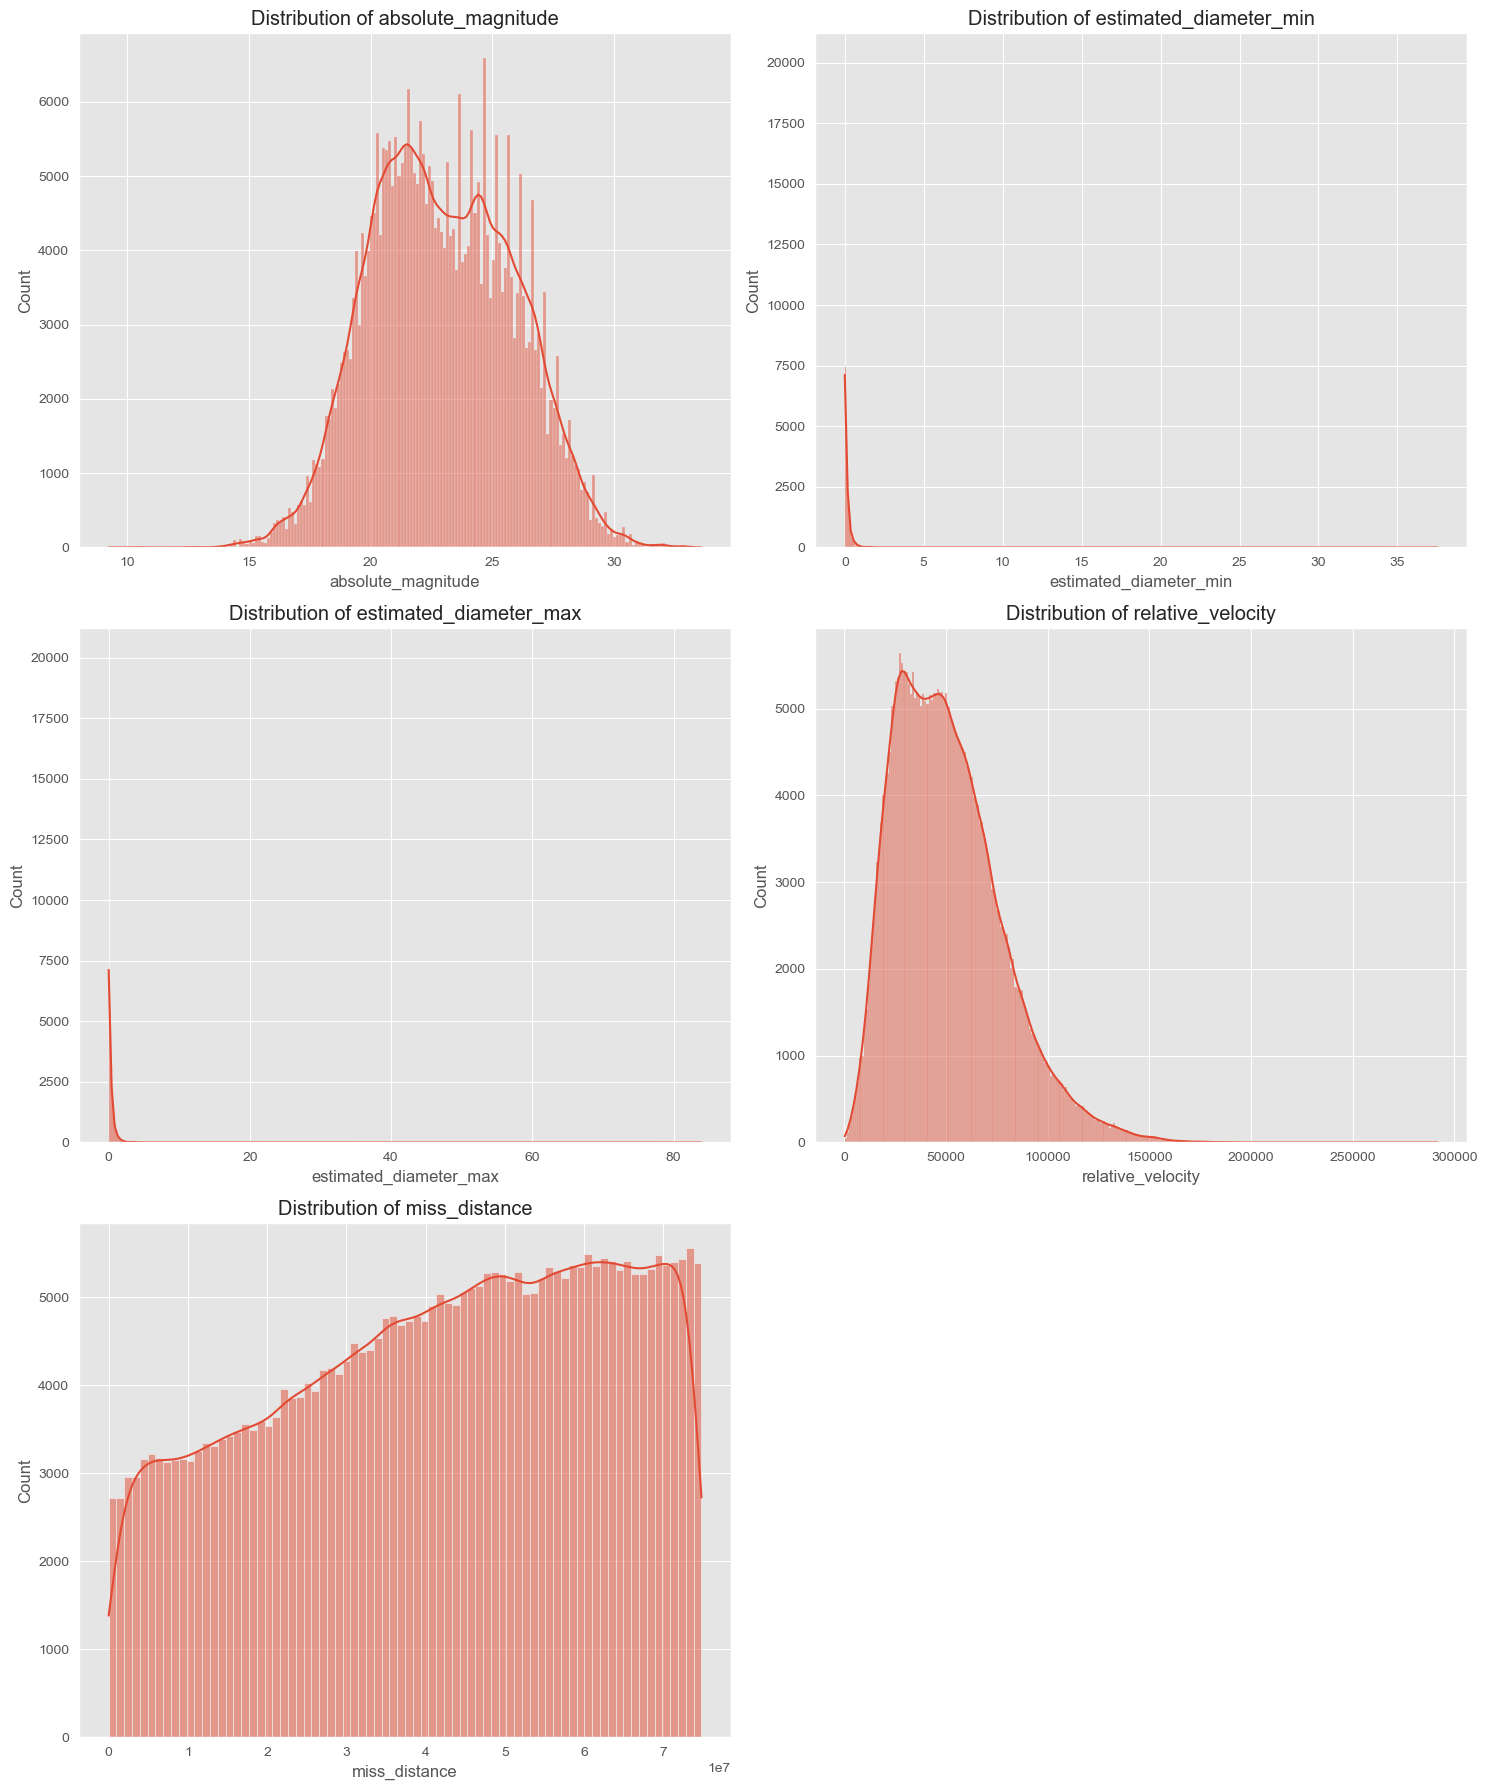

In [67]:
plt.figure(figsize = (15, 18))
for i, col in enumerate(feature_column):
    plt.subplot(3, 2, i+1)
    sns.histplot(dataset[col], kde = True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [76]:
dataset["is_hazardous"] = dataset["is_hazardous"].astype(int)

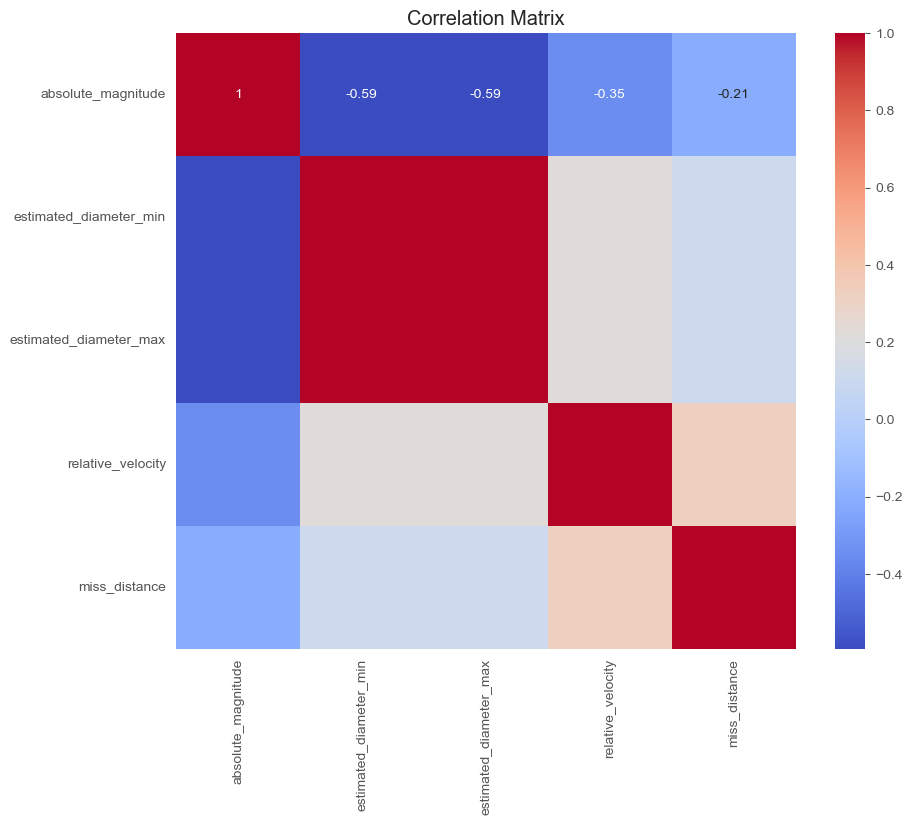

In [81]:
# Heatmap of correlations
plt.figure(figsize = (10, 8))
correlation_matrix = dataset[feature_column].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [83]:
# Standardizing Input Features
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [86]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     59011
           1       0.71      0.59      0.64      8629

    accuracy                           0.92     67640
   macro avg       0.83      0.78      0.80     67640
weighted avg       0.91      0.92      0.91     67640



In [89]:
confusion_matrix(y_test, y_pred)

array([[56989,  2022],
       [ 3581,  5048]], dtype=int64)

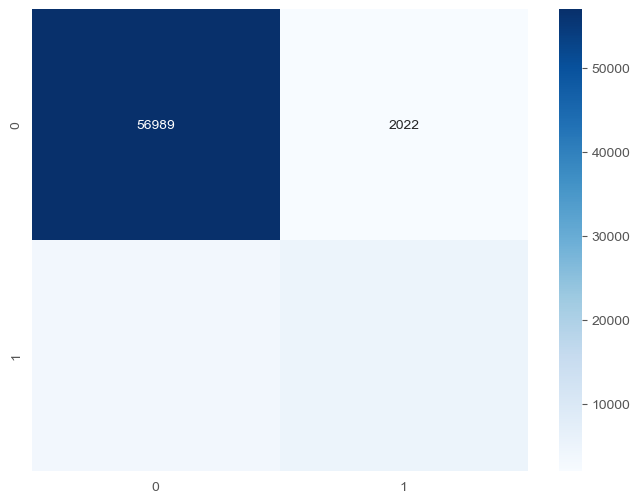

In [92]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues');

In [94]:
# Function to remove outliers using IQR
def outliers_removal(dataset, columns):
    for col in columns:
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]
    return dataset

In [95]:
# Implementing the function
data = outliers_removal(dataset, feature_column)

In [99]:
# Remove rows
row_remove = dataset.shape[0] - data.shape[0]

In [101]:
print(f'📉 We have removed approximately {row_remove} rows from the dataset.')

📉 We have removed approximately 42403 rows from the dataset.


C:\Users\shiva\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shiva\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shiva\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shiva\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

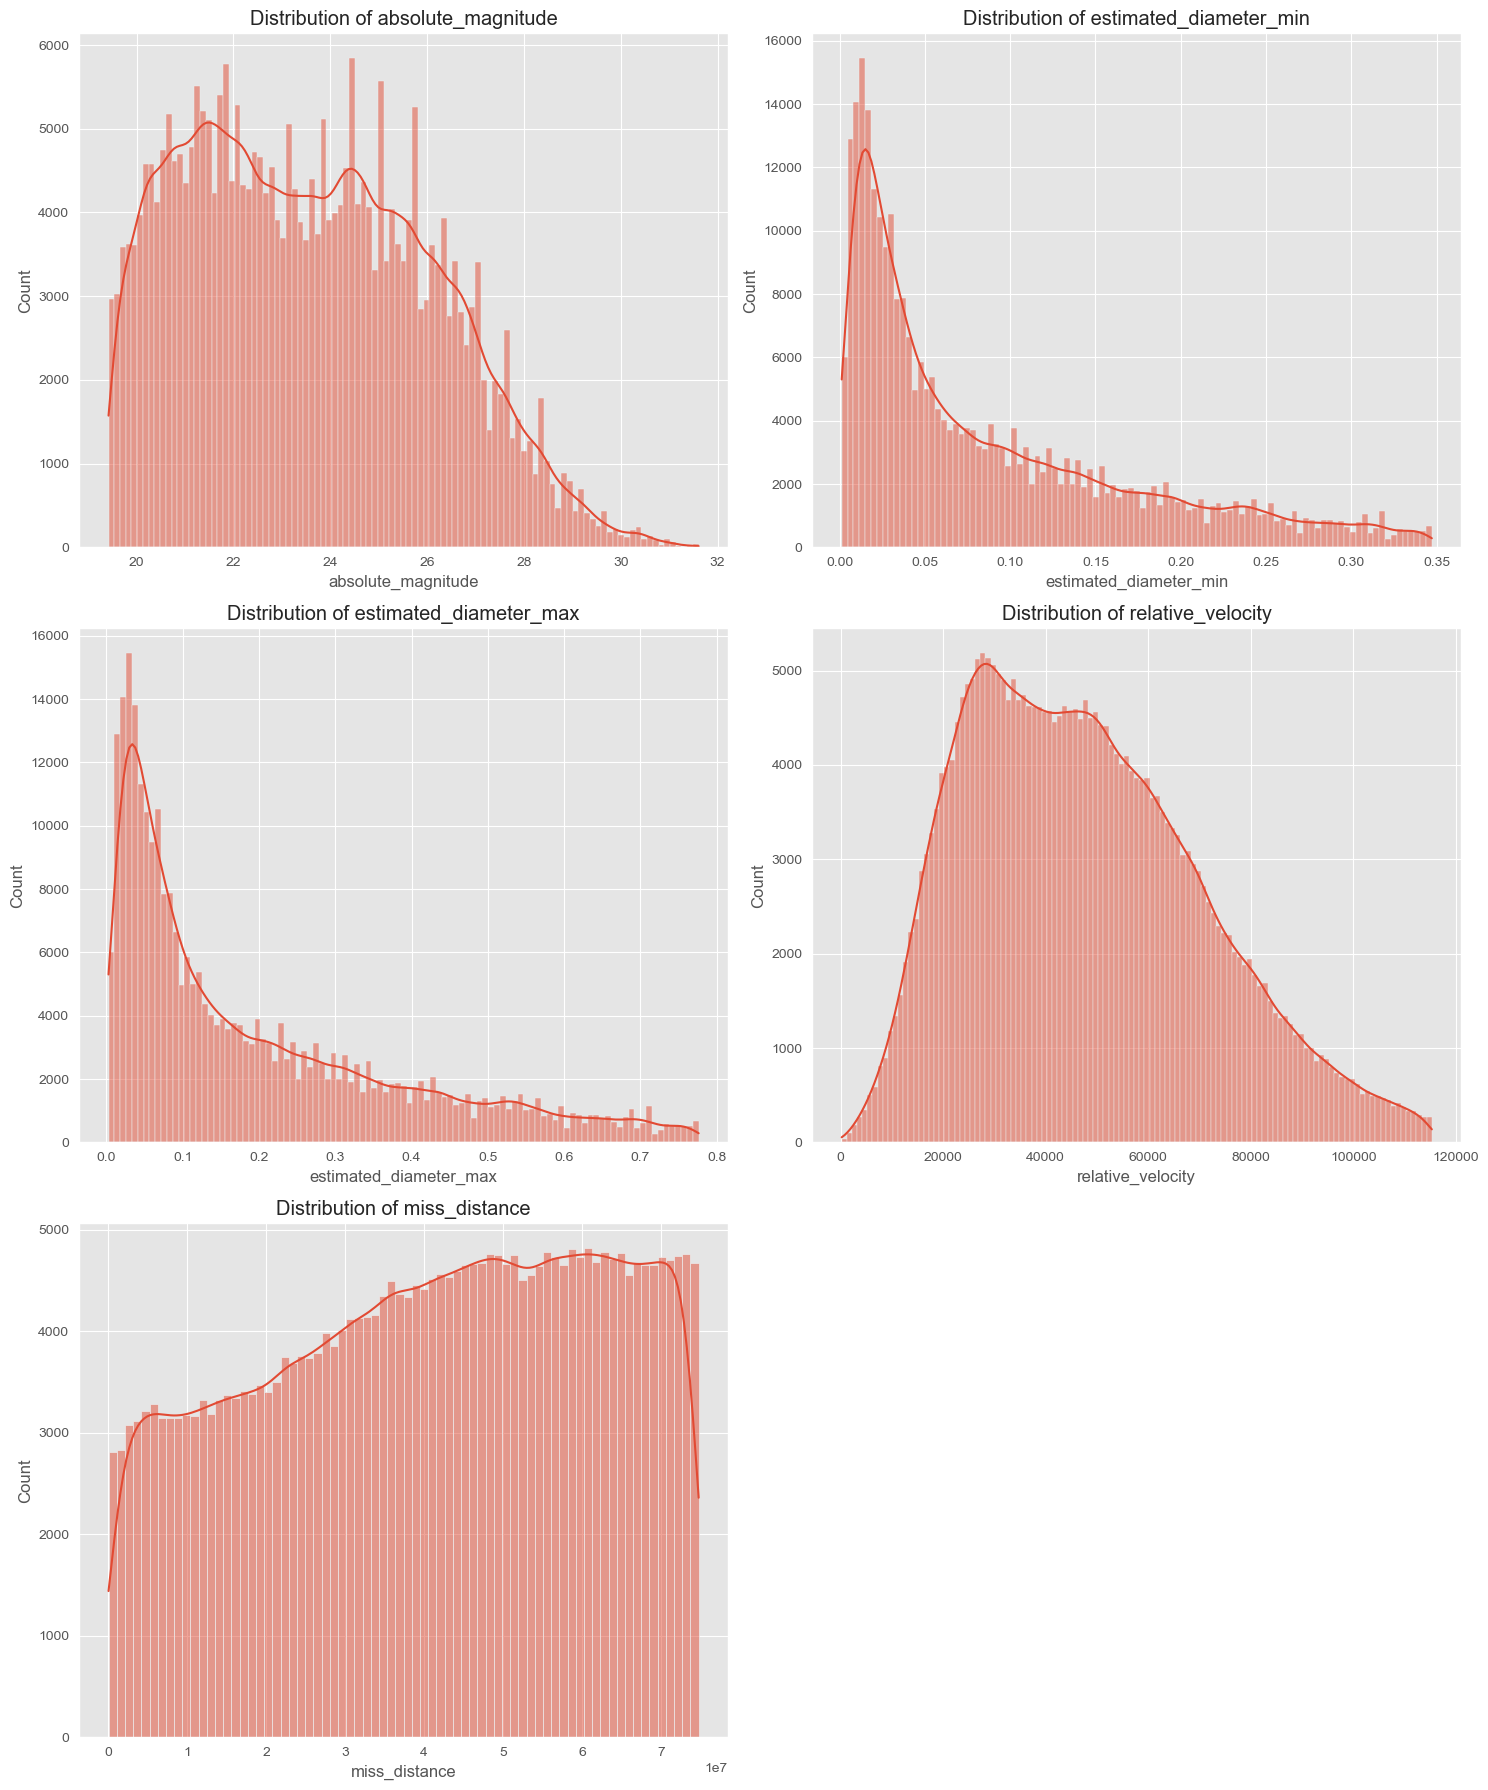

In [105]:
# After removing outliers, let's see the histogram
# Histograms
plt.figure(figsize = (15, 18))
for i, col in enumerate(feature_column):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

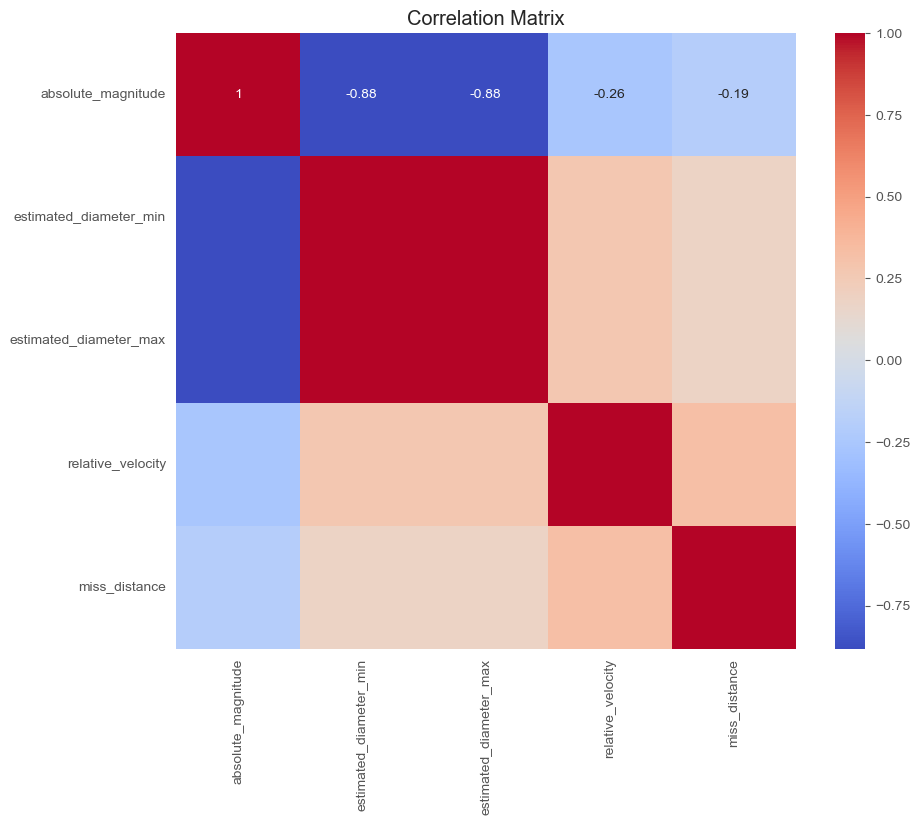

In [107]:
# Heatmap of correlations
plt.figure(figsize = (10, 8))
correlation_matrix = data[feature_column].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [154]:
x = data.drop('is_hazardous', axis = 1)
y = data['is_hazardous']

scaler = StandardScaler()
x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForest_preds = model.predict(x_test)
print(classification_report(y_test, RandomForest_preds))

accuracy = accuracy_score(y_test, RandomForest_preds)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     52775
           1       0.70      0.58      0.64      6385

    accuracy                           0.93     59160
   macro avg       0.83      0.78      0.80     59160
weighted avg       0.92      0.93      0.93     59160

Accuracy: 0.93


In [156]:
confusion_matrix(y_test, RandomForest_preds)

array([[51175,  1600],
       [ 2660,  3725]], dtype=int64)

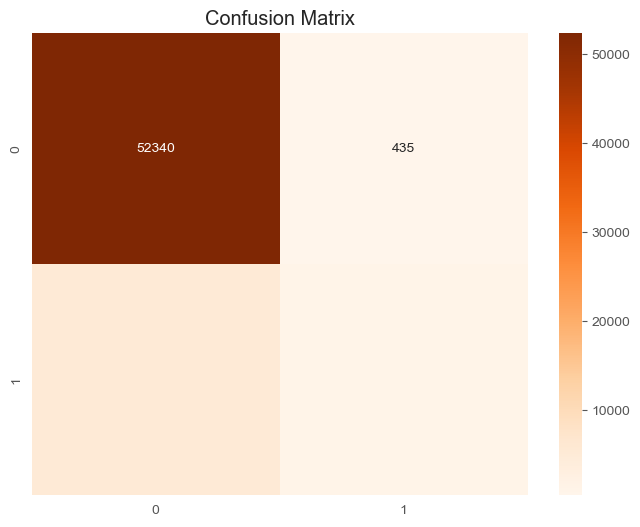

In [157]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Oranges')
plt.title('Confusion Matrix')
plt.show()

In [123]:
gb_model = GradientBoostingClassifier()
voting_model = VotingClassifier(estimators=[('gb', gb_model)], voting='soft')

# Train models
gb_model.fit(x_train, y_train)
voting_model.fit(x_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(x_test)
voting_predictions = voting_model.predict(x_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print()

print("Gradient Boosting Classifier:")
evaluate_model(y_test, gb_predictions, "Gradient Boosting Classifier")

print("Voting Classifier:")
evaluate_model(y_test, voting_predictions, "Voting Classifier")

Gradient Boosting Classifier:
Evaluation for Gradient Boosting Classifier:
Accuracy: 0.9038
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     52775
           1       0.72      0.18      0.28      6385

    accuracy                           0.90     59160
   macro avg       0.82      0.58      0.62     59160
weighted avg       0.89      0.90      0.88     59160

Precision: 0.8886
Recall: 0.9038
F1-Score: 0.8768

Voting Classifier:
Evaluation for Voting Classifier:
Accuracy: 0.9038
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     52775
           1       0.72      0.18      0.28      6385

    accuracy                           0.90     59160
   macro avg       0.82      0.58      0.62     59160
weighted avg       0.89      0.90      0.88     59160

Precision: 0.8886
Recall: 0.9038
F1-Score: 0.8768



In [158]:
RandomForestAccuracy = accuracy_score(y_test, RandomForest_preds)
GBAccuracy = accuracy_score(y_test, gb_predictions)
VotingClassifierAccuracy = accuracy_score(y_test, voting_predictions)

## Compairing The Models

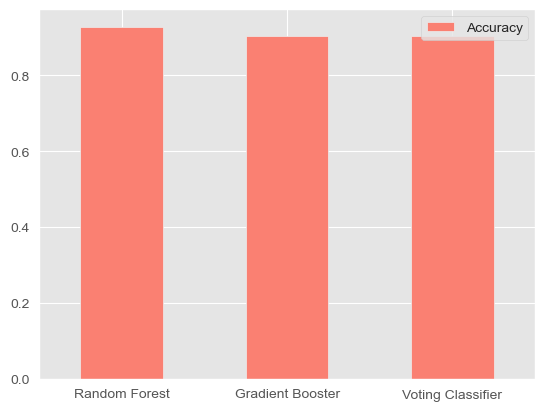

In [159]:
dict = {"Random Forest" : RandomForestAccuracy,
        "Gradient Booster" : GBAccuracy,
        "Voting Classifier" : VotingClassifierAccuracy}

compare = pd.DataFrame(dict, index = ["Accuracy"])
compare.T.plot.bar(color = ["salmon"])
plt.xticks(rotation = 0);

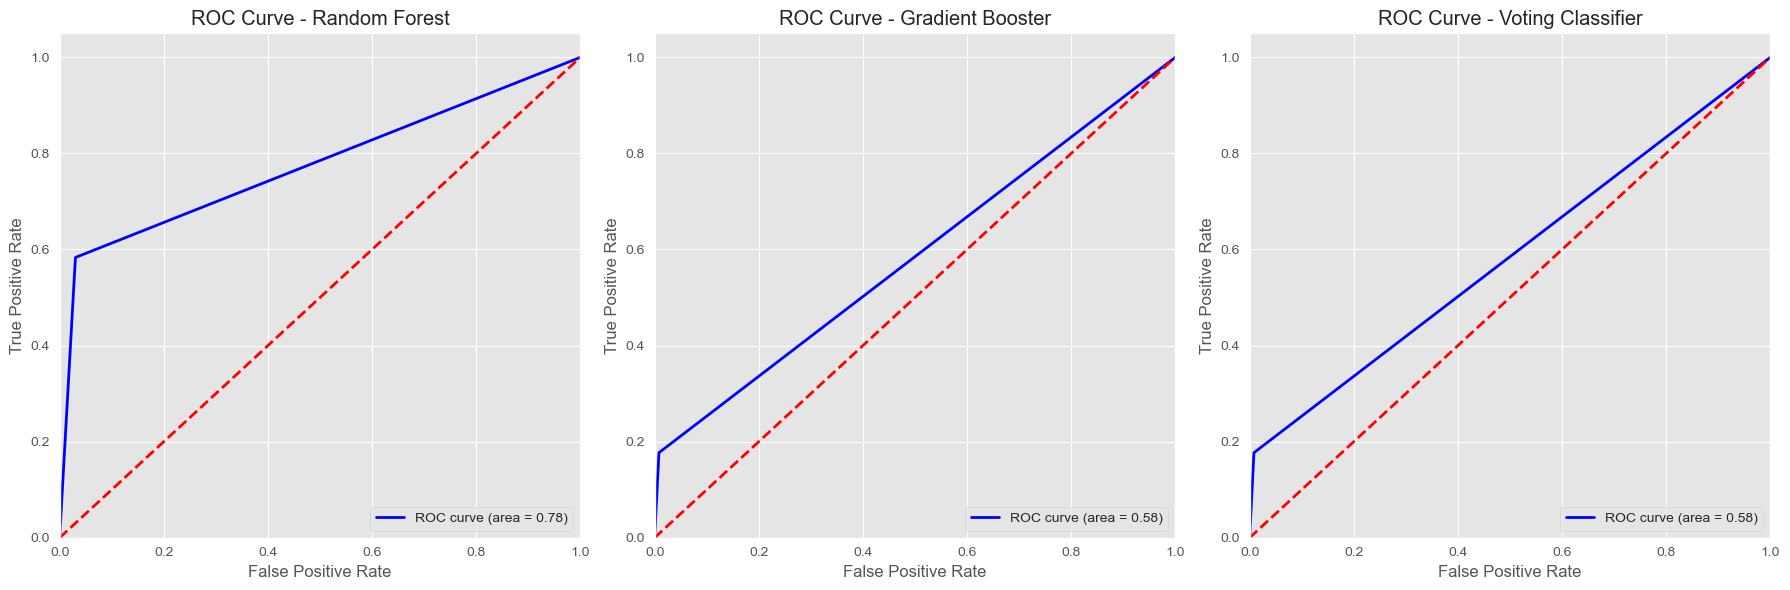

In [160]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test is the same for all models
# Replace these with your actual y_pred values for each model
y_preds = {
    'Random Forest': RandomForest_preds,
    'Gradient Booster': gb_predictions,
    'Voting Classifier': voting_predictions
}

# Plotting the ROC curves using subplots
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

for i, (model_name, y_pred) in enumerate(y_preds.items()):
    # Calculate the ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    axes[i].plot(fpr, tpr, color='blue', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
    axes[i].plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve - {model_name}')
    axes[i].legend(loc = "lower right")

plt.tight_layout()
plt.show()